# Statistics Lab 9 - Diagnostics Part 2

In [ ]:
import pandas as pd
import numpy as np 
import scipy
from plotnine import ggplot, aes, geom_bar, stat_qq, stat_qq_line, position_dodge, geom_col, theme_minimal, geom_point
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import seaborn as sns
from statsmodels.stats.outliers_influence import OLSInfluence

## Question Set 1

For the next few questions, we will revisit the mtcars data set. Use the whole data set (do not subset).

In [3]:
mtcars = pd.read_csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/mtcars.csv")

### Question 1
Create the Pearson's correlation between all the quantitative x-variables.  What is the largest value in magnitude of the correlation among the x-variables?

In [5]:
mtcars.head(10)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [ ]:
test_corr_matrix = mtcars[['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']]

corr_matrix = np.corrcoef(test_corr_matrix, rowvar = False)

corr_list = sorted(
    abs(
        np.round(
            np.unique(corr_matrix)
        , 2)
    ).tolist()
, reverse=True)

print(corr_list)


[1.0, 1.0, 1.0, 0.9, 0.9, 0.89, 0.87, 0.85, 0.85, 0.83, 0.81, 0.81, 0.79, 0.79, 0.78, 0.78, 0.78, 0.75, 0.74, 0.72, 0.72, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.7, 0.7, 0.7, 0.69, 0.69, 0.68, 0.66, 0.66, 0.66, 0.66, 0.6, 0.6, 0.59, 0.59, 0.59, 0.59, 0.58, 0.57, 0.57, 0.56, 0.56, 0.55, 0.55, 0.55, 0.53, 0.52, 0.49, 0.49, 0.48, 0.45, 0.45, 0.44, 0.43, 0.43, 0.43, 0.42, 0.39, 0.39, 0.27, 0.27, 0.24, 0.23, 0.21, 0.21, 0.17, 0.17, 0.17, 0.13, 0.09, 0.09, 0.09, 0.06, 0.06]


### Question 2
Create the linear model: wt + hp + wt*hp and look at the QQ-plot.  In this plot, Normality seems like a reasonable assumption?

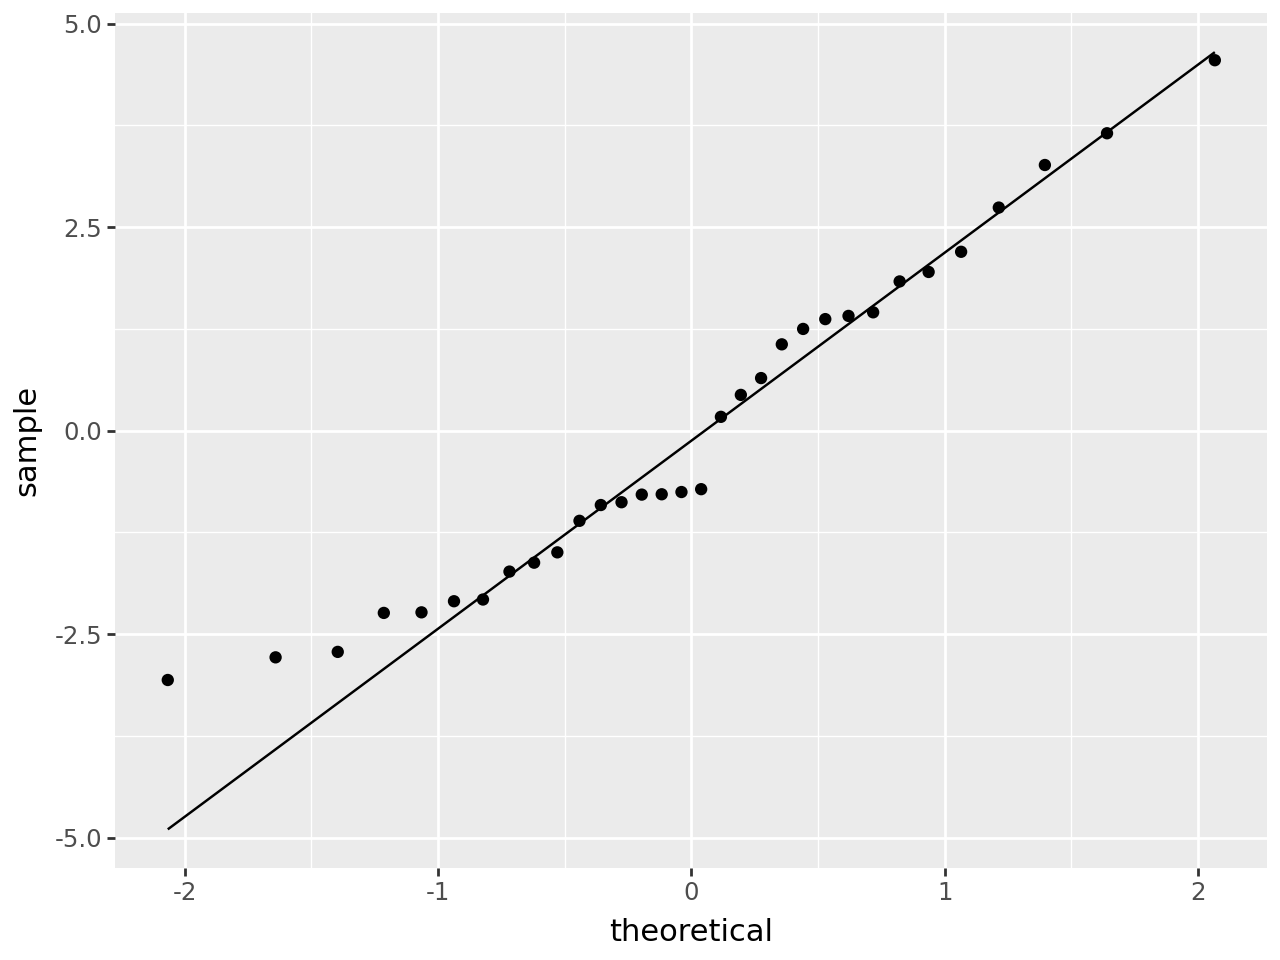

In [ ]:
mtcars_mlr1 = smf.ols("mpg ~ wt + hp + wt*hp", data = mtcars).fit()

mtcars1 = mtcars
mtcars1['resid'] = mtcars_mlr1.resid
mtcars['predicted'] = mtcars_mlr1.predict()

mtcars_mlr1_qq = (ggplot(mtcars1, aes(sample = mtcars1['resid'])) +
                        stat_qq() +
                        stat_qq_line())

mtcars_mlr1_qq.show()

In [57]:
stat, p = scipy.stats.shapiro(mtcars1['resid'])
print(stat, p)

0.9544665428322854 0.19277531413143245


Answer: True

### Question 3

Using the model from above, create the residual plot.  What would be your conclusion about the assumption of homogeneity of the variance?

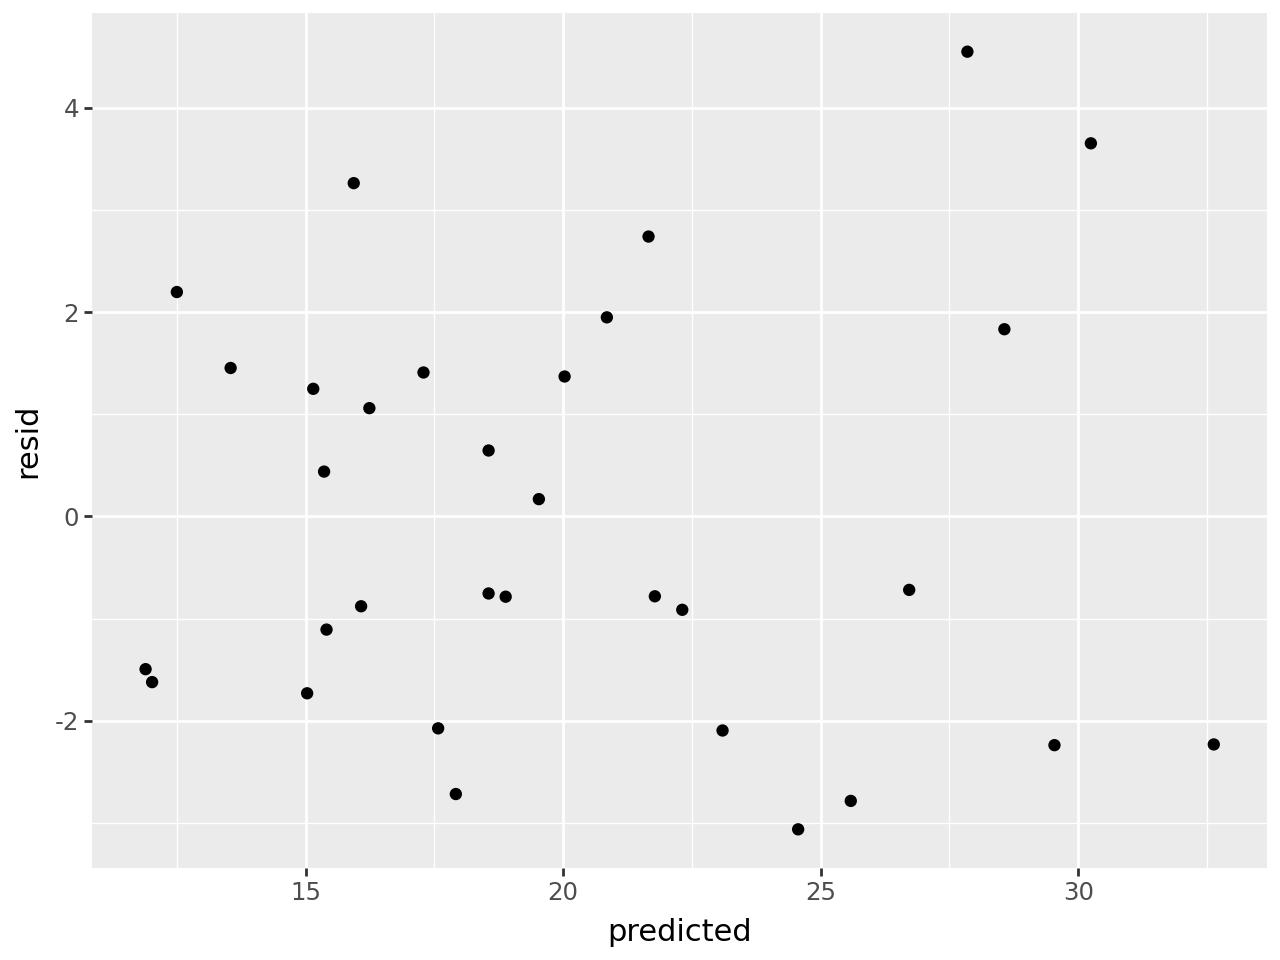

In [59]:
mtcars_mlr1_resid_plot = (ggplot(mtcars1, aes(x = 'predicted', y = 'resid')) +
                          geom_point())

mtcars_mlr1_resid_plot.show()

Answer: Homogeneity of the variance appears appropriate since the spread of the residuals are fairly consistent.

### Question 4

We can use the residual plot to help us decide if the errors are Normally distributed.

Answer: False

## Question Set 2

For the rest of the problems, we will be using the cars2010 data set (this data set is a training data set, so you do not need to subset....use the entire data set).

In [60]:
cars = pd.read_csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/cars2010.csv")

### Question 5

Create the linear model with the following variables and calculate the Cook's D statistic.  What is the largest value for Cook's D (recall that FE..Fuel Economy is the response variable)? Keep answer accuracy to three decimal places.

In [74]:

cars_mlr = smf.ols("FE ~ EngDispl + C(Transmission) + C(AirAspirationMethod) + C(TransLockup) + C(TransCreeperGear) + C(DriveDesc) + C(IntakeValvePerCyl) + C(CarlineClassDesc) + C(VarValveLift)", data = cars).fit()

In [77]:
# influence = OLSInfluence(cars_mlr)

influence = OLSInfluence(cars_mlr)

cooks_d = influence.cooks_distance[0]
sorted(cooks_d, reverse=True)

[0.05388356595830584,
 0.05388356595830583,
 0.04157316876596504,
 0.04157316876596504,
 0.027782038924781528,
 0.021184440590530332,
 0.018968799410398564,
 0.018968799410398564,
 0.01551599077769751,
 0.014798698924599063,
 0.012767798723427473,
 0.011363733508366078,
 0.011363733508366052,
 0.010820320871249728,
 0.010820320871249728,
 0.008536453114810908,
 0.008219225073717055,
 0.008146015066822576,
 0.008146015066822576,
 0.007453110610542895,
 0.006900063818840144,
 0.006474306338662103,
 0.006275145099832829,
 0.006210036681844694,
 0.0059246778850121804,
 0.005763848793235285,
 0.005694198454485765,
 0.005285607947873246,
 0.0052783269742260434,
 0.005221530679287749,
 0.005203227108552593,
 0.0051860030372675335,
 0.005065483212449431,
 0.005065483212449431,
 0.0048080147966957105,
 0.004612685652137138,
 0.0045635843795124075,
 0.0044701529793478014,
 0.0043584398562619454,
 0.004329089681658112,
 0.004240070829019978,
 0.004165096669334977,
 0.004097032477955714,
 0.003939

Answer: this seems wrong. In R I got that the max value is 0.448. 

### Question 6

Now let's use the Hat values to identify influential points and external studentized residuals to identify outliers.  How many observations are above the Hat value cutoff AND has a magnitude above 3?